<a href="https://colab.research.google.com/github/raj815patel/DataAnalysisProject/blob/main/Fin320_Python_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Machine Learning 
by Raj Patel 

Project 2

24 March 2021

Fin320-102


Python is an extremely versatile programming language that can be used to build web applications, software development, automation, machine learning, data analysis and so much more. Machine learning is an extremely powerful method used for artificial intelligence, self-driving cars, prediction models and much more. The uses of machine learning are endless and will be used to advance technology. Machine learning can be applied to finance as well. It can be used to predict future values of a stock price. Predicting future values of a stock can be very helpful when deciding what stock to invest or determine what stocks will go up or down. However, the prediction models lack important information which would be news. News about companies has a big play in their stock prices. With machine learning it is very difficult to incorporate news to predict prices and requires human intelligence to analyze it. Machine learning is heavily reliant on data, with data you are able to make tests and train your machine learning models. The more data you have the better it is for your model. With more data you are able to train and test more effectively leading to more accurate predictions and less errors. In this machine learning model we will be predicting IBM stock close price based on the data from March 16 2020 - March 16 2021. The model will predict 25 days out. Since we want to see how accurate the prediction model is we will already know the actual close price of the days it will be predicting but the model will act like it does not know the close price. That way we can compare the actual close price of the stock with the prediction model price.

In [ ]:
#Import libraries
import numpy as np 
import pandas as pd
import pandas_datareader as web
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

The code above is importing the necessary libraries for the project. Pandas will be used to build dataframes and retrieve data from yahoo finance. Numpy will be used to create arrays. Sklearn is an important library when trying to build machine learning models. Sklearn gives you the ability to train, test and create your models. Some other libraries that people opt to use for machine learning are Keras and TensorFlow. Lastly matplotlib is imported so we are able to see visual charts on our data and allow us to compare visually.

In [ ]:
#Load Data 
df =web.get_data_yahoo('ibmd',start='2020-03-16',end='2021-3-16')
df.head()

RemoteDataError: ignored

First step in creating a model is to import data, it can be from a file, or an api. Python makes it easy to obtain data directly from the yahoo finance website. I chose to work with IBM stock so I imported IBM stock from the starting date of March 16 2020 to the end date of March 16 2021. Then putting the data into a pandas dataframe so we can manipulate in the future. We get the dates, high, low, open, close,
volumes and adjusted close price of the IBM stock when imported.

In [ ]:
# Number of Trading Days
df.shape

(253, 6)

df.shape gives the shape of the dataframe. So we have 253 rows and 6 columns. The 253 rows reflects on how many days we are working with. Since I am working with a year of the data, I get 253 since trading only takes place on weekdays and is halted for holidays. Therefore the model will be working 253 days of stock information.

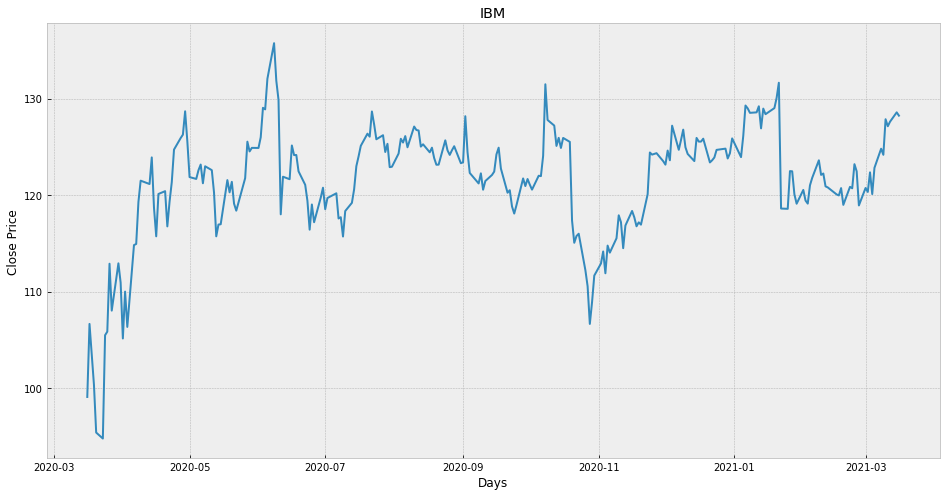

In [ ]:
#Graph Close Price Data 
plt.figure(figsize=(16,8))
plt.title('IBM')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])

 In the code above matplotlib is used to plot the IBM stock on a graph. The days are the x axis and the close price is the y axis. The chart shows the close price of the IBM stock from the start and end date we defined above. There are 253 closing prices plotted on the graph. This graph will be important when comparing to our model predictions since it will give a visual representation of the actual closing price vs what the model prediction of the close price.

In [ ]:
# Get Close Price
df=df[['Close']]
df.head()

,Close
Date,
2020-03-16,99.080002
2020-03-17,106.650002
2020-03-18,103.550003
2020-03-19,100.339996
2020-03-20,95.389999


Since we are working with only the closing price of the stock we do not need all the other columns. In the code above we set the dataframe(df) equal to just the closing price. So now every time (df) is called only the closing price will be shown, not the open, high, low, since we do not need those columns. 

In [ ]:
#Create Variable To Predict 'x' days out into the Future 
future_days=25 
#Create Column (target) shifted 'x' days up
df['Prediction']=df[['Close']].shift(-future_days)
df.tail()

,Close,Prediction
Date,,
2021-03-10,127.870003,NaN
2021-03-11,127.139999,NaN
2021-03-12,127.610001,NaN
2021-03-15,128.580002,NaN
2021-03-16,128.240005,NaN


In the code above a variable is created called future_days which will predict 25 days into the future. This variable will be used to reflect the number of days the model will predict into the future. In the df dataframe a new column is created which will reflect the target data. The prediction column that was added is to predict future values away from the current price. The .shift() function is used to shift/move then index by a set number. Since we want to predict future prices, the - is put in front of future_days to shift at the most recent price. If the - is not put it would shift starting from the top of the dataframe or at the start of the data. Essentially, we are making the 25 most recent close price dates prediction set to NaN or blank.

In [ ]:
#Create Feature Data Set (X) and convert it to a numpy array and remove last 'x'days/rows
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[ 99.08000183]
 [106.65000153]
 [103.55000305]
 [100.33999634]
 [ 95.38999939]
 [ 94.76999664]
 [105.48000336]
 [105.84999847]
 [112.88999939]
 [108.02999878]
 [112.93000031]
 [110.93000031]
 [105.13999939]
 [110.        ]
 [106.33999634]
 [114.81999969]
 [114.94000244]
 [119.29000092]
 [121.5       ]
 [121.15000153]
 [123.91000366]
 [118.69000244]
 [115.73000336]
 [120.12000275]
 [120.41000366]
 [116.76000214]
 [119.30999756]
 [121.34999847]
 [124.72000122]
 [125.91999817]
 [126.26999664]
 [128.69000244]
 [125.55999756]
 [121.87000275]
 [121.68000031]
 [122.58000183]
 [123.16999817]
 [121.23000336]
 [122.98999786]
 [122.58999634]
 [120.26000214]
 [115.73000336]
 [116.94999695]
 [116.98000336]
 [121.55999756]
 [120.29000092]
 [121.37999725]
 [119.12000275]
 [118.38999939]
 [121.76000214]
 [125.54000092]
 [124.52999878]
 [124.90000153]
 [124.88999939]
 [126.        ]
 [129.05000305]
 [128.88999939]
 [132.05999756]
 [135.75      ]
 [131.86999512]
 [129.86999512]
 [118.01000214]
 [121.91

Here a feature dataset is being created as a numpy array. The df.drop() is used to drop the 'Prediction' column so we only remain with the close price column. Since we are predicting the last 25 days or future_days from the stock data we want all of the rows besides future_days that is why the - is put in the front. We do know the actual price of those 25 days but it is taken out so the model is able to predict those days and able to compare it to the actual price.

In [ ]:
#Create Target Data Set(y) and convert it to a numpy array and get all of the target values except the last 'x' rows 
y = np.array(df['Prediction'])[:-future_days]
print(y)

[116.76000214 119.30999756 121.34999847 124.72000122 125.91999817
 126.26999664 128.69000244 125.55999756 121.87000275 121.68000031
 122.58000183 123.16999817 121.23000336 122.98999786 122.58999634
 120.26000214 115.73000336 116.94999695 116.98000336 121.55999756
 120.29000092 121.37999725 119.12000275 118.38999939 121.76000214
 125.54000092 124.52999878 124.90000153 124.88999939 126.
 129.05000305 128.88999939 132.05999756 135.75       131.86999512
 129.86999512 118.01000214 121.91000366 121.65000153 125.15000153
 124.15000153 124.16000366 122.47000122 121.06999969 119.41000366
 116.41999817 119.02999878 117.19000244 119.75       120.76999664
 118.54000092 119.69999695 120.19000244 117.58000183 117.70999908
 115.70999908 118.34999847 119.19999695 120.59999847 123.
 124.01000214 125.11000061 126.37000275 126.05999756 128.66999817
 127.33000183 125.79000092 126.20999908 124.47000122 125.31999969
 122.90000153 122.94000244 124.30999756 125.83999634 125.44999695
 126.12000275 124.95999908

Next a target data set is created. This data is using the 'Predictions' column as the data and is converted into a numpy array. Again we do not include the future_days of 25 in the data set so the model is again the predict those prices. The target data set is the target prices of the data. 

In [ ]:
#Split data into 75% training and 25% testing
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25)

Here the data set is split to determine how much data is going to be used to train the model and how much data is going to be used to test the model. test_size is set .25 so 25% of the data will be used for testing and the rest of the data will be used to train the model. 

In [ ]:
#Create the models 
#Create decison tree regressor model 
tree = DecisionTreeRegressor().fit(x_train,y_train)
#Create liner regression model 
lr = LinearRegression().fit(x_train,y_train)

In the code above 2 different models are being made. The first model that is created is a DecisionTreeRegressor model that will take in the x and y values created above. The second model that is being created is a LinearRegression model that also takes in the x and y values created above. DecisionTreeRegressor is a type of decision tree. It takes the averages and predicts an output. Opposed to a Linear regression model where it will predict 1 line for the values and will predict them based on the linear line. Depending on what you are trying to predict with a certain type of dataset a LinearRegression model or DecisionTreeRegressor may be best suited. In this case we will be using both models and see how both perform in predicting future stock value.

In [ ]:
#Get last x rows of the feature dataset
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[123.94000244],
       [126.13999939],
       [129.28999329],
       [128.99000549],
       [128.52999878],
       [128.58000183],
       [129.21000671],
       [126.91999817],
       [128.97000122],
       [128.38999939],
       [129.02000427],
       [130.08000183],
       [131.6499939 ],
       [118.61000061],
       [118.58000183],
       [122.48999786],
       [122.47000122],
       [120.08000183],
       [119.11000061],
       [120.54000092],
       [119.44000244],
       [119.12000275],
       [121.01999664],
       [121.79000092],
       [123.61000061]])

Here the x_future is created from the feature dataset which is the dataset with the original stock closing prices with the prediction column dropped. Since we only want the last x rows or the future_days of the dataset set the tail() function is called to get the data from the the bottom of the dataset. Finally it is created into a numpy array.

In [ ]:
#Show model tree prediction 
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model liner regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[122.09999847 122.23999786 120.73000336 120.80000305 120.06999969
 119.97000122 120.73000336 118.98999786 120.86000061 120.70999908
 123.20999908 122.47000122 118.93000031 120.73999786 120.33000183
 122.36000061 123.15999985 122.83000183 124.80999756 124.88999939
 127.87000275 127.13999939 124.47000122 128.58000183 128.41000366]

[122.64174597 122.48111198 122.25111344 122.27301721 122.30660485
 122.30295385 122.2569537  122.42415994 122.27447783 122.31682699
 122.27082683 122.19343053 122.07879669 123.03091899 123.03310937
 122.74761885 122.74907892 122.92358604 122.99441122 122.88999896
 122.97031595 122.99368091 122.8549518  122.79872952 122.66584124]


In the code above a tree_prediction variable is made and the variable is predicting the future values in x_values. tree.predict =() is a function that predicts values within the given period. the tree.predict() is used when working with the DecisionTreeRegressor model. Similar to that a variable lr_prediction is made to predict on the same period but it is predicted with linear regression. So here we are getting prediction values for linear regression and decision trees.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


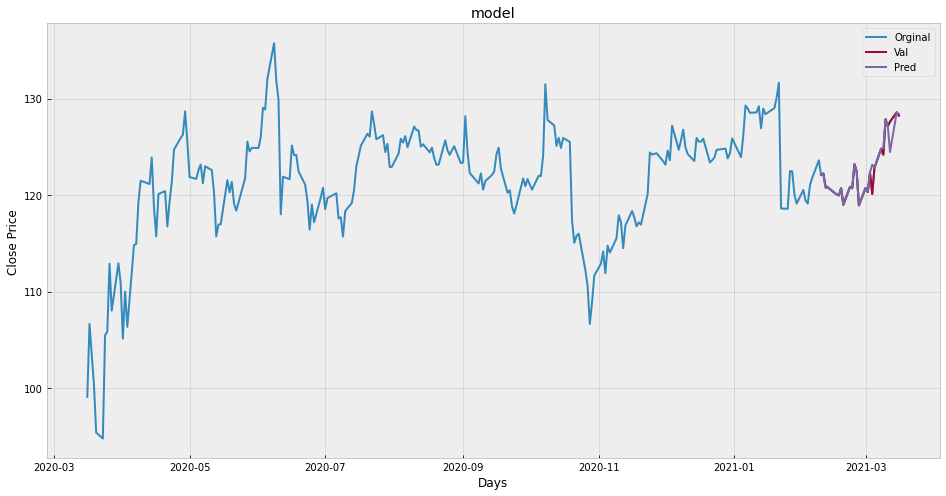

In [ ]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orginal','Val','Pred'])
plt.show()

After the models are set up and running, plotting it on a graph is the best way to visualize it and see the results. In the graph the blue line is the past value of the stock. The purple line is what the model predicted about the stock price and the red line is the actual value of the stock in the same time period the model is predicting at. So to best analyze the graph is to look at the red line and the purple line. The model seemed to predict it accurately up until the halfway point of that time period. You can optimize and improve the model to make more accurate predictions. This graph  is representing the DecisionTreeRegressor model, the next graph represents the linear regression model.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


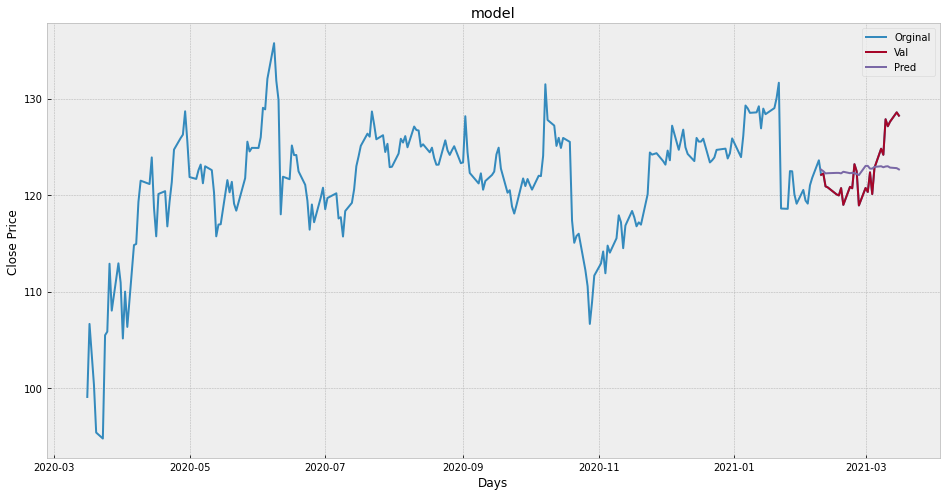

In [ ]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions 
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orginal','Val','Pred'])
plt.show()

Here is a graph using matplotlib to plot the linear regression model that was created. Again the blue line represents the past value of the stock. The purple line represents the prediction the model put, and the red line is the actual value in the same period the prediction is taking place. From looking at the graph we can say this model is not accurate when compared to the actual price. The Regression Tree model was more accurate than this. The model may be a bit less accurate since it is using linear regression to predict the values and using linear regression may not be best suited for this situation since the stock close price fluctuates rather than going up at a steady pace. Depending on the data set a model may be more useful than others.

In this project a simple machine learning mode is built using python. The models that were built were trying to predict the future values of the IBM stock based on a year's data. The models predictions were decent and a lot of key factors are not taken into consideration in the models. Machine learning is an important tool in technology and finance. The things that can be done with machine learning are endless.
